## Import the necessary packages

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,f1_score,recall_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot

## Load the dataset

In [3]:
data=pd.read_excel("C:\\Users\DELL\Desktop\Datamites projects\Apr2020\Sales_data.xlsx",parse_dates=['Created'])
data

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,2018-11-14 10:05:00,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,1,2018-11-14 09:22:00,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2,2018-11-14 09:21:00,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,3,2018-11-14 08:46:00,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,4,2018-11-14 07:34:00,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...,...
7417,7417,2018-04-28 09:45:00,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,7418,2018-04-28 09:43:00,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,7419,2018-04-28 09:20:00,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,7420,2018-04-28 08:04:00,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


## Create a new dataframe from existing dataframe 

In [4]:
data=pd.DataFrame(data,columns=['Created','Product_ID','Source','Mobile','EMAIL','Sales_Agent','Location','Delivery_Mode','Status'])
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,2018-11-14 10:05:00,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,2018-11-14 09:22:00,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2018-11-14 09:21:00,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,2018-11-14 08:46:00,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,2018-11-14 07:34:00,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,2018-04-28 09:45:00,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,2018-04-28 09:43:00,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,2018-04-28 09:20:00,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,2018-04-28 08:04:00,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


## Perform Exploratory Data Analysis(EDA) steps

In [5]:
data.describe()

,Product_ID
count,7364.000000
mean,15.947311
std,6.072937
min,0.000000
25%,12.000000
50%,18.000000
75%,19.000000
max,28.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Created        7422 non-null   datetime64[ns]
 1   Product_ID     7364 non-null   float64       
 2   Source         7405 non-null   object        
 3   Mobile         5612 non-null   object        
 4   EMAIL          7422 non-null   object        
 5   Sales_Agent    7399 non-null   object        
 6   Location       7364 non-null   object        
 7   Delivery_Mode  7422 non-null   object        
 8   Status         7422 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 522.0+ KB


In [7]:
data.shape

(7422, 9)

In [8]:
data.isna().sum().to_frame().T

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,58,17,1810,0,23,58,0,0


In [9]:
data.isna().sum().to_frame().any()

0    True
dtype: bool

In [10]:
data.dtypes

Created          datetime64[ns]
Product_ID              float64
Source                   object
Mobile                   object
EMAIL                    object
Sales_Agent              object
Location                 object
Delivery_Mode            object
Status                   object
dtype: object

In [11]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

## Data Exploration Insights

In [12]:
data.groupby(by=['Product_ID'])['Sales_Agent'].count()

Product_ID
0.0        2
1.0      104
2.0       38
3.0        7
4.0        1
5.0      485
6.0        7
7.0        1
8.0        6
9.0      992
10.0     168
11.0      12
12.0      36
13.0       4
14.0      27
15.0    1507
16.0       3
17.0       6
18.0    1709
19.0    1188
20.0     102
21.0      65
22.0       8
23.0       2
24.0       2
25.0      90
26.0      31
27.0     737
28.0       1
Name: Sales_Agent, dtype: int64

In [13]:
new=data.groupby(by=['Location'])['Delivery_Mode'].count()
new

Location
AUSTRALIA            25
Bangalore          2084
Chennai             909
Delhi               471
EUROPE                3
Howrah                1
Hyderabad           528
Kolkata              55
Malaysia              4
Mumbai              402
Other Locations    2500
Pune                142
Singapore            17
Trivandrum           58
UAE                  79
UK                   41
USA                  45
Name: Delivery_Mode, dtype: int64

## Location vs Delivery Mode

Text(0, 0.5, 'Delivery_Mode')

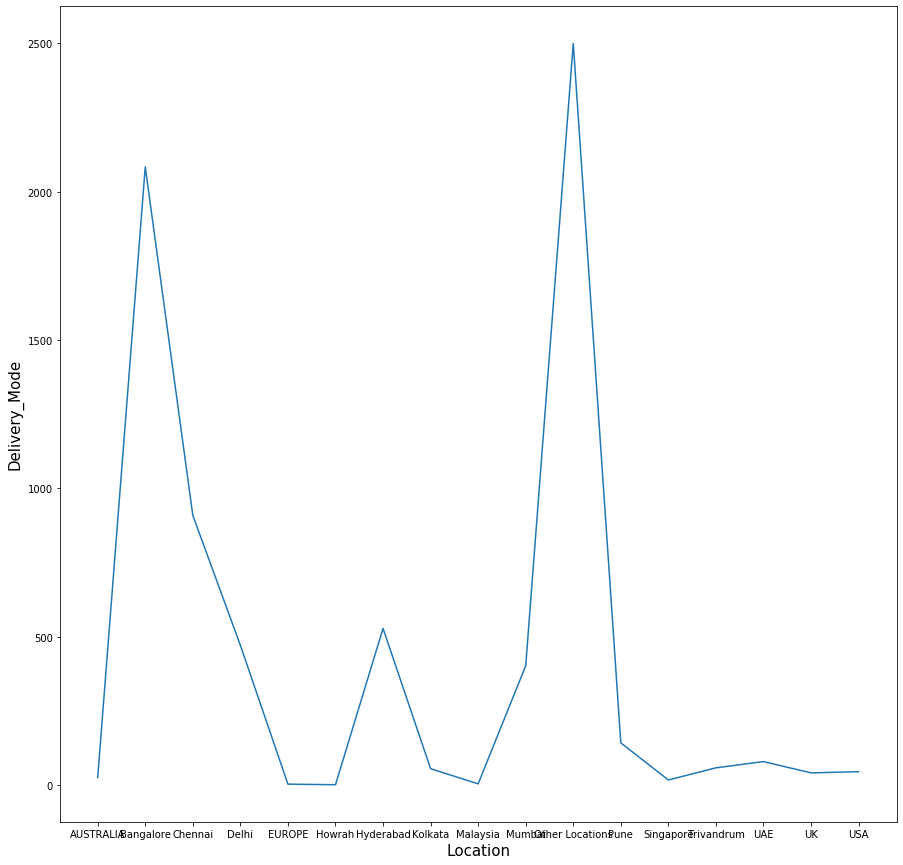

In [14]:
plt.figure(figsize=(15,15))
plt.plot(new)
plt.xlabel('Location',fontsize=15)
plt.ylabel('Delivery_Mode',fontsize=15)

In [15]:
data.groupby(by=['Sales_Agent'])['Product_ID'].mean()

Sales_Agent
Sales-Agent-1           NaN
Sales-Agent-10    14.200000
Sales-Agent-11    15.526464
Sales-Agent-12    16.460967
Sales-Agent-2     16.899743
Sales-Agent-3     15.994878
Sales-Agent-4     15.797730
Sales-Agent-5     16.970489
Sales-Agent-6     11.438596
Sales-Agent-7     14.970109
Sales-Agent-8     15.294118
Sales-Agent-9     16.350797
Name: Product_ID, dtype: float64

## Sales Agent v/s Product_ID

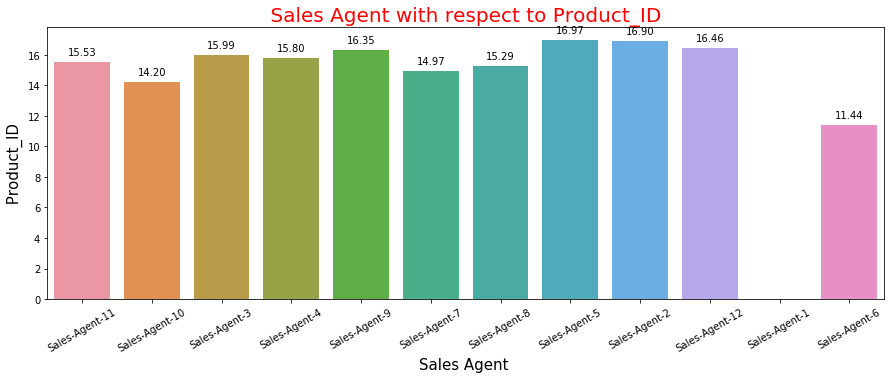

In [16]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Sales_Agent'],data['Product_ID'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Sales Agent ",fontsize=15,color='black')
plt.ylabel(" Product_ID ",fontsize=15,color='black')
plt.title(" Sales Agent with respect to Product_ID ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

> Sales_Agent 5 has maximum Product_ID.

In [17]:
delivery=data.groupby(by=['Product_ID'])['Delivery_Mode'].count()
delivery

Product_ID
0.0        2
1.0      105
2.0       38
3.0        7
4.0        1
5.0      487
6.0        7
7.0        1
8.0        6
9.0      992
10.0     168
11.0      12
12.0      36
13.0       5
14.0      27
15.0    1518
16.0       3
17.0       7
18.0    1711
19.0    1189
20.0     102
21.0      66
22.0       8
23.0       2
24.0       3
25.0      90
26.0      31
27.0     739
28.0       1
Name: Delivery_Mode, dtype: int64

## Product_ID vs Delivery_Mode

Text(0, 0.5, 'Delivery_Mode')

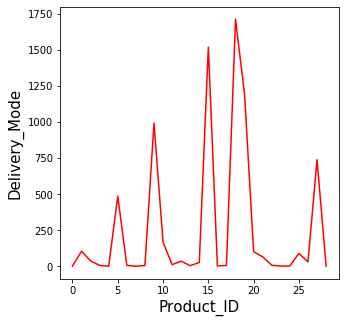

In [18]:
plt.figure(figsize=(5,5))
plt.plot(delivery,color='red')
plt.xlabel('Product_ID',fontsize=15)
plt.ylabel('Delivery_Mode',fontsize=15)

> Product_ID 18 has maximum delivery mode.

In [19]:
source=data.groupby(by=['Product_ID'])['Source'].count()
source

Product_ID
0.0        2
1.0      105
2.0       38
3.0        7
4.0        1
5.0      486
6.0        7
7.0        1
8.0        6
9.0      990
10.0     168
11.0      12
12.0      36
13.0       5
14.0      27
15.0    1516
16.0       3
17.0       7
18.0    1709
19.0    1189
20.0     102
21.0      66
22.0       8
23.0       2
24.0       3
25.0      90
26.0      31
27.0     739
28.0       1
Name: Source, dtype: int64

## Product_ID vs Source

Text(0, 0.5, 'Source')

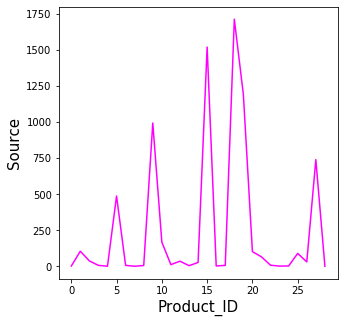

In [20]:
plt.figure(figsize=(5,5))
plt.plot(delivery,color='magenta')
plt.xlabel('Product_ID',fontsize=15)
plt.ylabel('Source',fontsize=15)

> Product_ID 18 has maximum sources.

In [21]:
location=data.groupby(by=['Location'])['Product_ID'].count()
location

Location
AUSTRALIA            25
Bangalore          2084
Chennai             909
Delhi               471
EUROPE                3
Howrah                1
Hyderabad           528
Kolkata              55
Malaysia              4
Mumbai              401
Other Locations    2496
Pune                142
Singapore            17
Trivandrum           58
UAE                  78
UK                   41
USA                  45
Name: Product_ID, dtype: int64

In [22]:
location_status=data.groupby(by=['Location'])['Status'].count()
location_status

Location
AUSTRALIA            25
Bangalore          2084
Chennai             909
Delhi               471
EUROPE                3
Howrah                1
Hyderabad           528
Kolkata              55
Malaysia              4
Mumbai              402
Other Locations    2500
Pune                142
Singapore            17
Trivandrum           58
UAE                  79
UK                   41
USA                  45
Name: Status, dtype: int64

## Location vs Status

Text(0.5, 1.0, 'Count of status based on location')

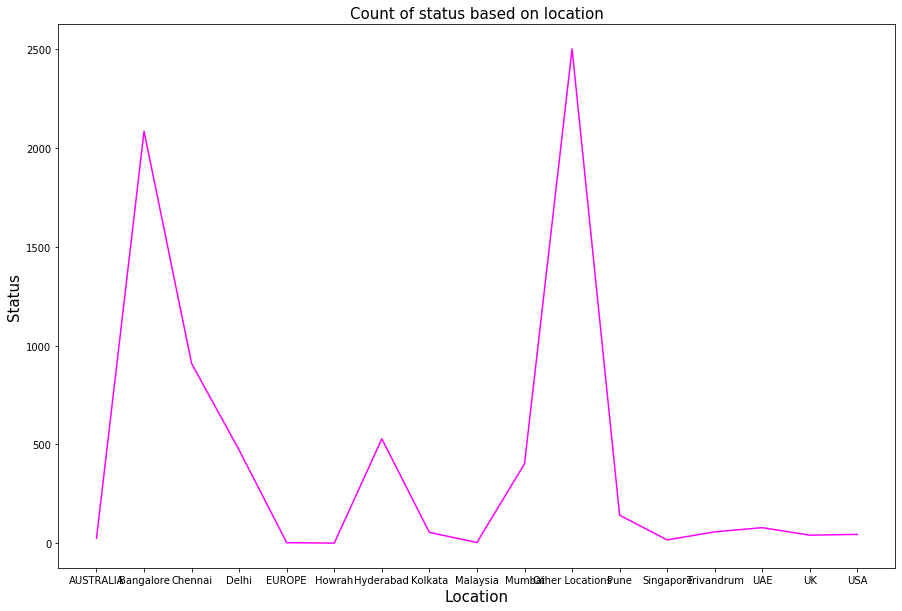

In [23]:
plt.figure(figsize=(15,10))
plt.plot(location_status,color='magenta')
plt.xlabel('Location',fontsize=15)
plt.ylabel('Status',fontsize=15)
plt.title("Count of status based on location",color='black',fontsize=15)

## Total count of different Product_IDs

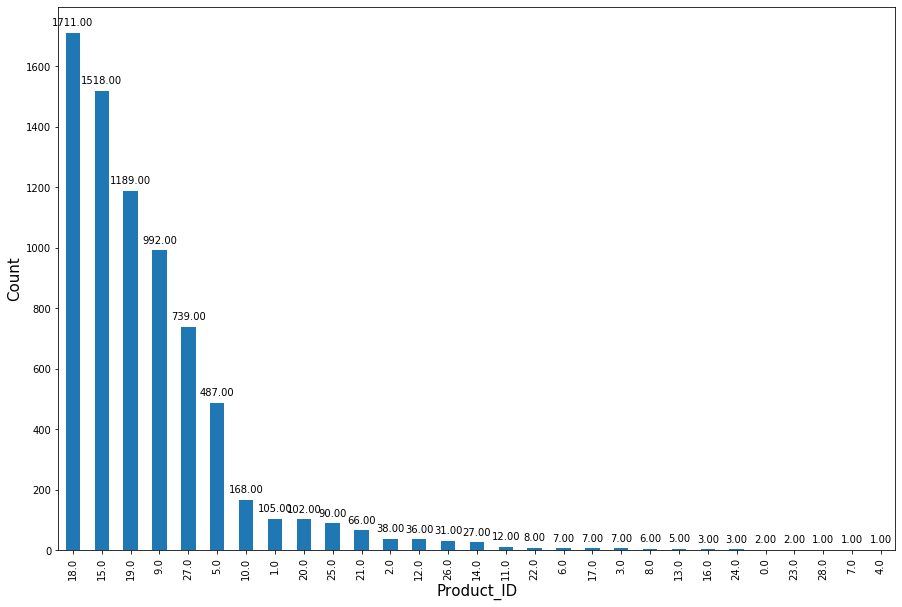

In [24]:
plt.figure(figsize=(15,10))
Product_ID=data.Product_ID.value_counts()
plt.xlabel('Product_ID',fontsize=15)
plt.ylabel('Count',fontsize=15)
splot=Product_ID.plot(kind='bar')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

> Product_ID 18 is sold maximum entries and Product_ID 28, 4 and 7 has only one entry each.

## Total count of different Sources

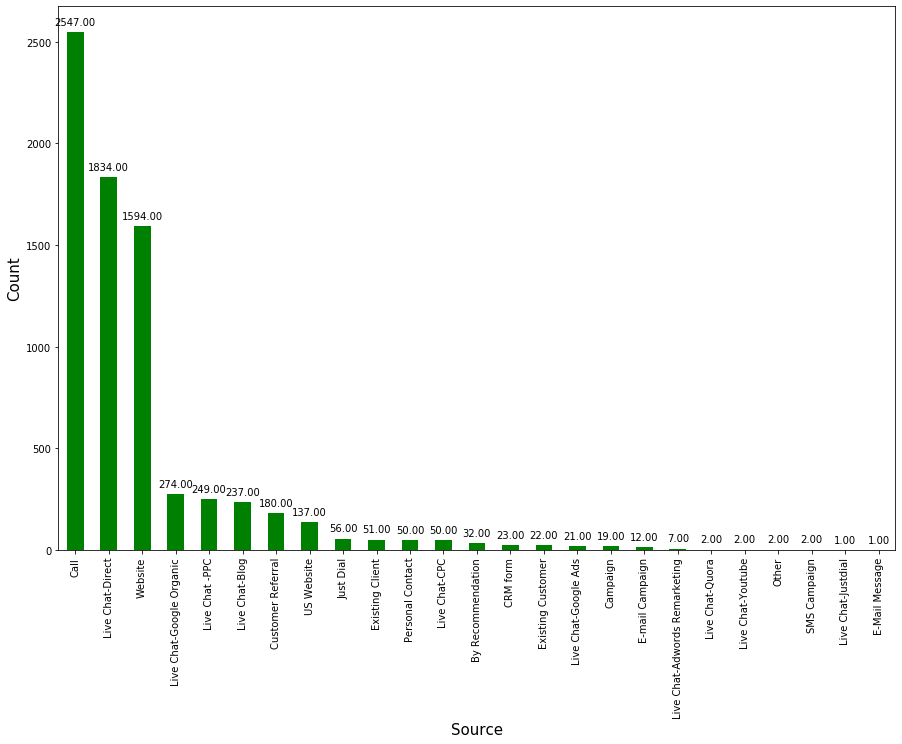

In [25]:
plt.figure(figsize=(15,10))
Source=data.Source.value_counts()
plt.xlabel('Source',fontsize=15)
plt.ylabel('Count',fontsize=15)
splot=Source.plot(kind='bar',color='green')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

> Most Source of getting lead is through call and e-mail message, Live-chat justdial gives only 1 lead.

## Total count of different Sales_Agents

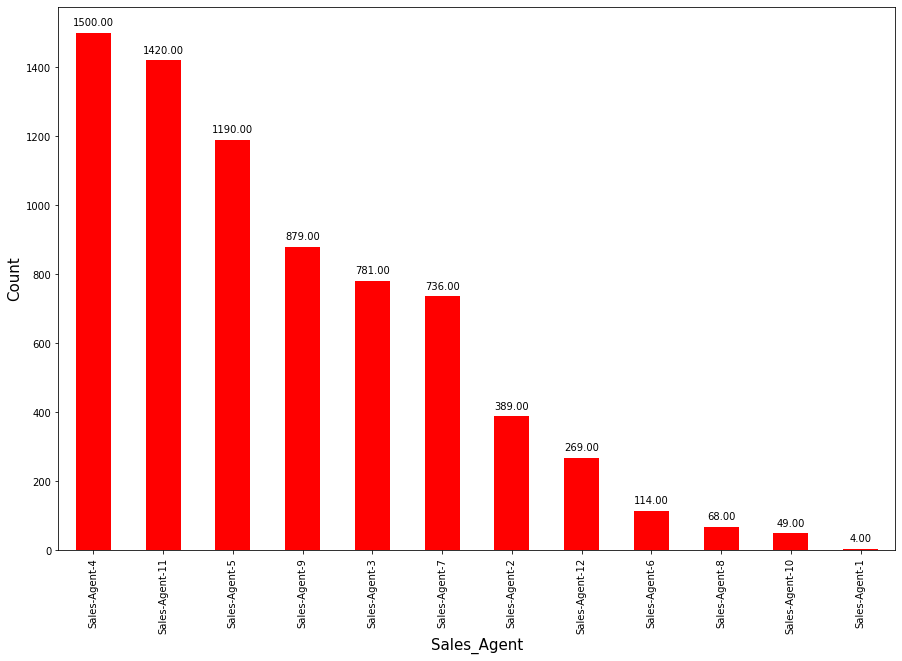

In [26]:
plt.figure(figsize=(15,10))
Sales_Agent=data.Sales_Agent.value_counts()
plt.xlabel('Sales_Agent',fontsize=15)
plt.ylabel('Count',fontsize=15)
splot=Sales_Agent.plot(kind='bar',color='red')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

> Sales-Agent 4 has maximum entries and Sales-Agent 1 has less entries.

## Total count of different locations

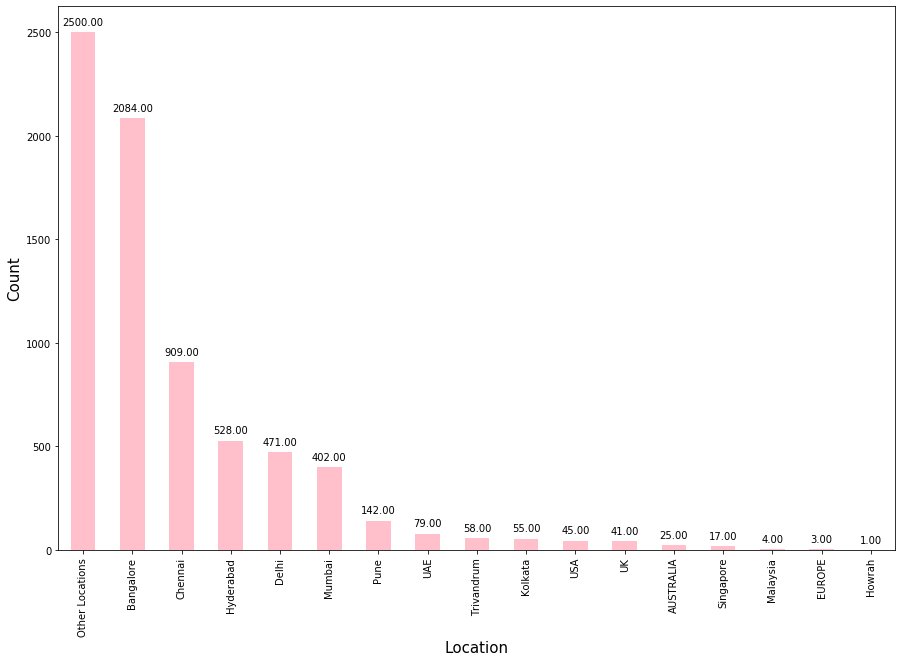

In [27]:
plt.figure(figsize=(15,10))
Location=data.Location.value_counts()
plt.xlabel('Location',fontsize=15)
plt.ylabel('Count',fontsize=15)
splot=Location.plot(kind='bar',color='pink')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

> Bangalore has most sales generation in India and Howrah has least sales generation in India.
> Other locations show maximum sales generation.

## Total count of different Delivery_Modes

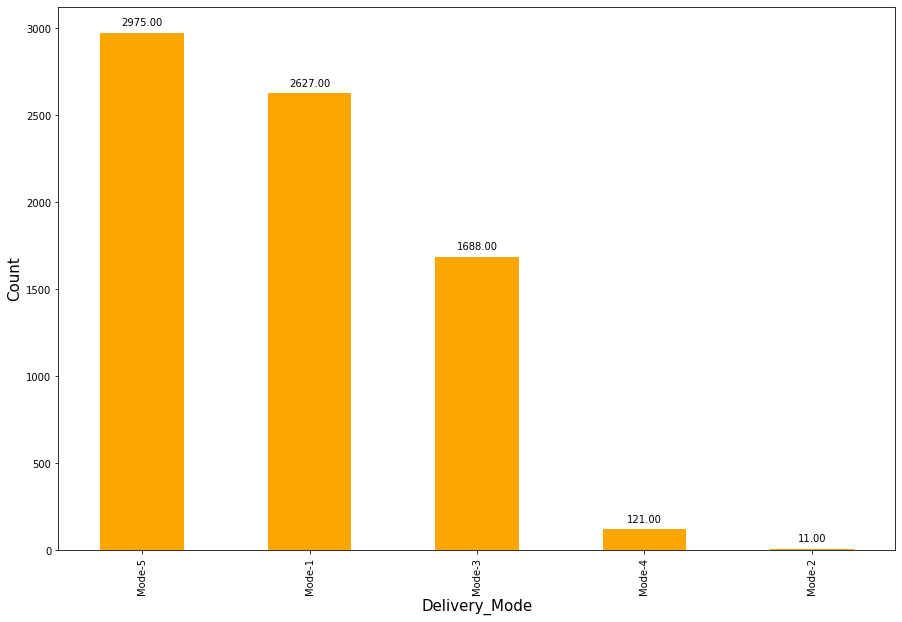

In [28]:
plt.figure(figsize=(15,10))
Delivery_Mode=data.Delivery_Mode.value_counts()
plt.xlabel('Delivery_Mode',fontsize=15)
plt.ylabel('Count',fontsize=15)
splot=Delivery_Mode.plot(kind='bar',color='orange')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

> Mode-5 is easy mode of delivery and Mode-2 is very difficult mode of delivery.

## Total count of different Status

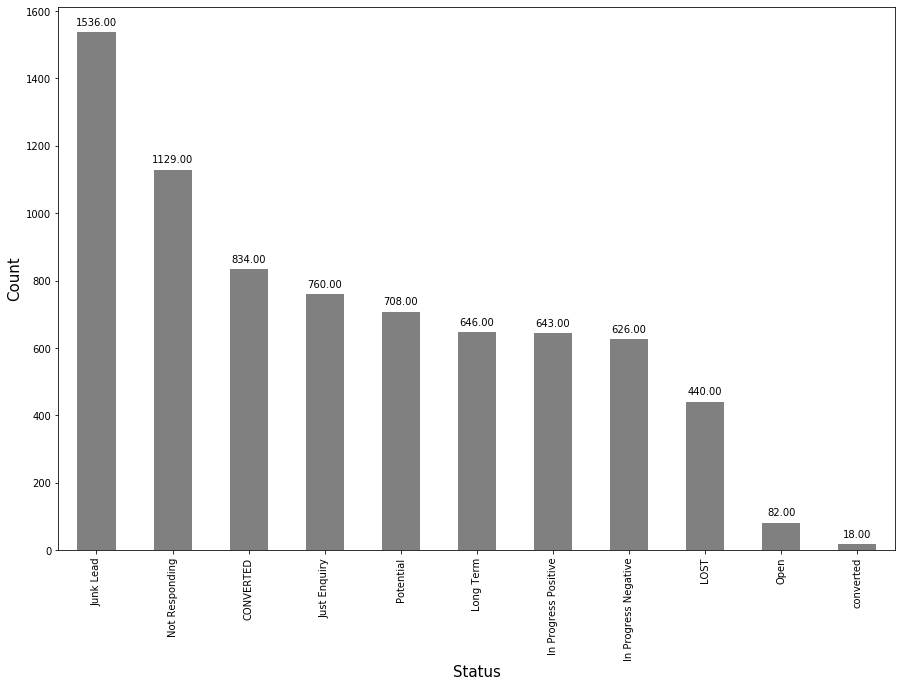

In [29]:
plt.figure(figsize=(15,10))
Status=data.Status.value_counts()
plt.xlabel('Status',fontsize=15)
plt.ylabel('Count',fontsize=15)
splot=Status.plot(kind='bar',color='Gray')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

> Here Junk lead has most entries in status and only few leads have been converted.

### Cleaning the data

In [30]:
data=data.drop(columns=['Mobile','EMAIL','Created'])

In [31]:
data.shape

(7422, 6)

In [32]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open


In [33]:
data.replace('',np.nan,inplace=True)
data.dropna(axis=0,inplace=True)
data.reset_index(inplace=True,drop=True)

In [34]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
1,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
2,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
3,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
4,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive


In [35]:
data.shape

(7328, 6)

In [36]:
data.isna().sum().to_frame().T

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0,0,0,0,0,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_ID     7328 non-null   float64
 1   Source         7328 non-null   object 
 2   Sales_Agent    7328 non-null   object 
 3   Location       7328 non-null   object 
 4   Delivery_Mode  7328 non-null   object 
 5   Status         7328 non-null   object 
dtypes: float64(1), object(5)
memory usage: 343.6+ KB


In [38]:
pd.get_dummies(data.Status,drop_first=True)

,In Progress Negative,In Progress Positive,Junk Lead,Just Enquiry,LOST,Long Term,Not Responding,Open,Potential,converted
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7323,0,0,0,0,1,0,0,0,0,0
7324,0,0,0,0,1,0,0,0,0,0
7325,0,0,0,0,0,0,1,0,0,0
7326,0,0,0,1,0,0,0,0,0,0


### Convert the Status field values into High Potential and Low Potential

In [39]:
data.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'High Potential',inplace=True)
data.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Low Potential',inplace=True)

In [40]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,High Potential
1,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,High Potential
2,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,High Potential
3,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Low Potential
4,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,High Potential


In [41]:
pd.get_dummies(data.Delivery_Mode,drop_first=True)

,Mode-2,Mode-3,Mode-4,Mode-5
0,0,0,0,0
1,0,0,0,1
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
7323,0,0,1,0
7324,0,0,0,1
7325,0,0,0,0
7326,0,0,0,0


In [42]:
pd.get_dummies(data.Location,drop_first=True)

,Bangalore,Chennai,Delhi,EUROPE,Howrah,Hyderabad,Kolkata,Malaysia,Mumbai,Other Locations,Pune,Singapore,Trivandrum,UAE,UK,USA
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7323,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7324,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7325,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7326,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [43]:
pd.get_dummies(data.Sales_Agent,drop_first=True)

,Sales-Agent-11,Sales-Agent-12,Sales-Agent-2,Sales-Agent-3,Sales-Agent-4,Sales-Agent-5,Sales-Agent-6,Sales-Agent-7,Sales-Agent-8,Sales-Agent-9
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7323,0,0,0,0,0,0,1,0,0,0
7324,0,1,0,0,0,0,0,0,0,0
7325,1,0,0,0,0,0,0,0,0,0
7326,0,0,0,0,1,0,0,0,0,0


In [44]:
pd.get_dummies(data.Source,drop_first=True)

,CRM form,Call,Campaign,Customer Referral,E-Mail Message,E-mail Campaign,Existing Client,Existing Customer,Just Dial,Live Chat -PPC,...,Live Chat-Google Ads,Live Chat-Google Organic,Live Chat-Justdial,Live Chat-Quora,Live Chat-Youtube,Other,Personal Contact,SMS Campaign,US Website,Website
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7323,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7324,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7326,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
pd.get_dummies(data.Delivery_Mode,drop_first=True)

,Mode-2,Mode-3,Mode-4,Mode-5
0,0,0,0,0
1,0,0,0,1
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
7323,0,0,1,0
7324,0,0,0,1
7325,0,0,0,0
7326,0,0,0,0


### Using Counter to count the key value pairs inside the dictionary for each feature

In [46]:
Counter(data.Location)

Counter({'Bangalore': 2079,
         'Other Locations': 2481,
         'Trivandrum': 58,
         'Hyderabad': 527,
         'Chennai': 907,
         'UK': 41,
         'USA': 45,
         'Delhi': 470,
         'UAE': 77,
         'Mumbai': 399,
         'Kolkata': 55,
         'Singapore': 17,
         'Pune': 139,
         'AUSTRALIA': 25,
         'EUROPE': 3,
         'Malaysia': 4,
         'Howrah': 1})

In [47]:
Counter(data.Source)

Counter({'Live Chat-Google Organic': 269,
         'Call': 2536,
         'Website': 1551,
         'Live Chat-Direct': 1827,
         'By Recommendation': 32,
         'Customer Referral': 180,
         'Live Chat-Blog': 237,
         'Live Chat -PPC': 249,
         'Live Chat-Google Ads': 20,
         'Live Chat-Adwords Remarketing': 7,
         'E-Mail Message': 1,
         'Existing Client': 51,
         'Live Chat-CPC': 49,
         'Existing Customer': 22,
         'Live Chat-Quora': 2,
         'US Website': 129,
         'Just Dial': 56,
         'Campaign': 19,
         'Other': 2,
         'E-mail Campaign': 12,
         'CRM form': 22,
         'SMS Campaign': 2,
         'Personal Contact': 50,
         'Live Chat-Youtube': 2,
         'Live Chat-Justdial': 1})

In [48]:
Counter(data.Sales_Agent)

Counter({'Sales-Agent-3': 780,
         'Sales-Agent-4': 1495,
         'Sales-Agent-11': 1414,
         'Sales-Agent-7': 734,
         'Sales-Agent-9': 878,
         'Sales-Agent-8': 68,
         'Sales-Agent-5': 1182,
         'Sales-Agent-2': 389,
         'Sales-Agent-12': 269,
         'Sales-Agent-10': 5,
         'Sales-Agent-6': 114})

In [49]:
Counter(data.Status)

Counter({'High Potential': 2862, 'Low Potential': 4466})

In [50]:
Counter(data.Product_ID)

Counter({9.0: 990,
         19.0: 1188,
         18.0: 1706,
         15.0: 1501,
         27.0: 737,
         5.0: 484,
         2.0: 38,
         3.0: 7,
         25.0: 90,
         10.0: 168,
         20.0: 101,
         11.0: 12,
         21.0: 65,
         1.0: 104,
         12.0: 36,
         13.0: 4,
         24.0: 2,
         26.0: 31,
         16.0: 3,
         23.0: 2,
         22.0: 8,
         8.0: 6,
         14.0: 27,
         6.0: 7,
         17.0: 6,
         0.0: 2,
         28.0: 1,
         7.0: 1,
         4.0: 1})

In [51]:
Counter(data.Delivery_Mode)

Counter({'Mode-1': 2614,
         'Mode-5': 2903,
         'Mode-3': 1681,
         'Mode-2': 10,
         'Mode-4': 120})

## Using Label Encoder

### Import the necessary package

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
enc=LabelEncoder()
data.Source=enc.fit_transform(data.Source)
data.Sales_Agent=enc.fit_transform(data.Sales_Agent)
data.Location=enc.fit_transform(data.Location)
data.Delivery_Mode=enc.fit_transform(data.Delivery_Mode)
data.Status=enc.fit_transform(data.Status)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_ID     7328 non-null   float64
 1   Source         7328 non-null   int32  
 2   Sales_Agent    7328 non-null   int32  
 3   Location       7328 non-null   int32  
 4   Delivery_Mode  7328 non-null   int32  
 5   Status         7328 non-null   int32  
dtypes: float64(1), int32(5)
memory usage: 200.5 KB


## Checking for outliers

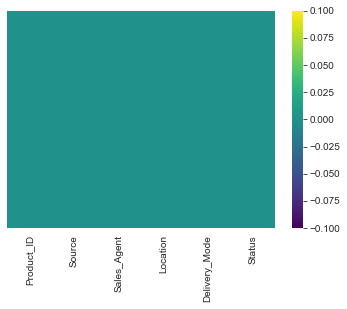

In [55]:
sns.set_style('whitegrid')
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [56]:
corr=data.corr()
corr

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.060910,0.006529,-0.041227,-0.036025,-0.085415
Source,0.060910,1.000000,-0.019623,0.054901,-0.151242,0.039717
Sales_Agent,0.006529,-0.019623,1.000000,-0.129056,-0.224688,-0.137074
Location,-0.041227,0.054901,-0.129056,1.000000,0.397186,0.312023
Delivery_Mode,-0.036025,-0.151242,-0.224688,0.397186,1.000000,0.220445
Status,-0.085415,0.039717,-0.137074,0.312023,0.220445,1.000000


## Correlation Matrix

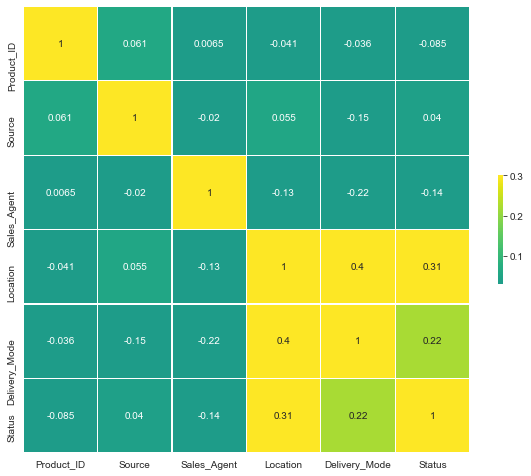

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='viridis', vmax=.3,vmin=.03 ,center=0,square=True, linewidths=.2, cbar_kws={"shrink": .2}, annot=True)

In [58]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9.0,16,4,1,0,0
1,19.0,2,5,10,4,0
2,18.0,24,1,13,0,0
3,15.0,24,8,6,0,1
4,18.0,2,8,1,0,0


In [59]:
data.isna().sum().to_frame().T

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0,0,0,0,0,0


In [60]:
Product_ID_correlation=data.corr()['Product_ID'].sort_values()
Product_ID_correlation

Status          -0.085415
Location        -0.041227
Delivery_Mode   -0.036025
Sales_Agent      0.006529
Source           0.060910
Product_ID       1.000000
Name: Product_ID, dtype: float64

In [61]:
data.corr()['Sales_Agent'].sort_values()

Delivery_Mode   -0.224688
Status          -0.137074
Location        -0.129056
Source          -0.019623
Product_ID       0.006529
Sales_Agent      1.000000
Name: Sales_Agent, dtype: float64

In [62]:
data.corr()['Delivery_Mode'].sort_values()

Sales_Agent     -0.224688
Source          -0.151242
Product_ID      -0.036025
Status           0.220445
Location         0.397186
Delivery_Mode    1.000000
Name: Delivery_Mode, dtype: float64

In [63]:
data.corr()['Source'].sort_values()

Delivery_Mode   -0.151242
Sales_Agent     -0.019623
Status           0.039717
Location         0.054901
Product_ID       0.060910
Source           1.000000
Name: Source, dtype: float64

In [64]:
data.corr()['Location'].sort_values()

Sales_Agent     -0.129056
Product_ID      -0.041227
Source           0.054901
Status           0.312023
Delivery_Mode    0.397186
Location         1.000000
Name: Location, dtype: float64

## Machine Leaning model to predict the Lead Category (High Potential , Low Potential)

## Define X and y variables

In [65]:
X=data[['Product_ID','Source','Sales_Agent','Location','Delivery_Mode']]
y=data.Status

In [66]:
X.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,9.0,16,4,1,0
1,19.0,2,5,10,4
2,18.0,24,1,13,0
3,15.0,24,8,6,0
4,18.0,2,8,1,0


In [67]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Status, dtype: int32

## Use train-test split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

In [70]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (5496, 5)
X_test shape =  (1832, 5)
y_train shape =  (5496,)
y_test shape =  (1832,)


## Using Standard Scaler

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [73]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (5496, 5)
X_test shape =  (1832, 5)
y_train shape =  (5496,)
y_test shape =  (1832,)


## Using SMOTE technique

In [74]:
# !pip install imblearn

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
smote=SMOTE()
X_train, y_train = smote.fit_sample(X_train,y_train)

In [77]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (6652, 5)
X_test shape =  (1832, 5)
y_train shape =  (6652,)
y_test shape =  (1832,)


## Using PCA technique

### Import the necessary package

In [78]:
from sklearn.decomposition import PCA

### Define the Model

In [79]:
pca=PCA(svd_solver='auto',random_state=10)
X=pd.DataFrame(pca.fit_transform(X))
X.head()

,0,1,2,3,4
0,3.742911,6.935790,-5.467673,-1.643644,1.228632
1,-9.157046,-3.515229,4.998300,0.540038,-0.786862
2,12.903747,-0.469192,6.940380,-2.434308,3.387419
3,12.359758,1.957042,-1.111424,3.150533,1.197565
4,-9.442157,-3.226381,-4.998045,2.313376,1.153146


In [80]:
pca.explained_variance_ratio_

array([0.52549458, 0.26459349, 0.13698127, 0.05666528, 0.01626539])

In [81]:
pca.explained_variance_

array([72.94237527, 36.72745392, 19.01397138,  7.86554237,  2.25775114])

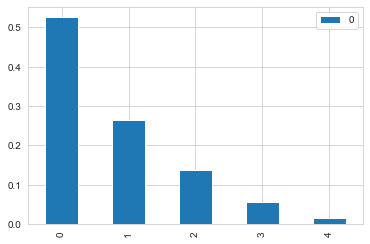

In [82]:
sales_var=pd.DataFrame(pca.explained_variance_ratio_)
sales_var.plot(kind='bar')

### Train and predict the Model

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=10)

model=RandomForestClassifier(random_state=10,n_estimators=100,max_depth=20,criterion='gini')
model.fit(X_train,y_train)

y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[420 313]
 [270 829]]


col_0,0,1
Status,,
0,420,313
1,270,829


### Finding the accuracy,precision, recall and F1 score

In [84]:
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy of Training =  86.35371179039302
Accuracy of Testing =   68.17685589519651
Precision score =  67.90171272606725
Recall score =  68.17685589519651
F1 score =  68.0013514614794


### Generate the classification report

In [85]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.61      0.57      0.59       733
           1       0.73      0.75      0.74      1099

    accuracy                           0.68      1832
   macro avg       0.67      0.66      0.67      1832
weighted avg       0.68      0.68      0.68      1832



### Plotting ROC Curve

In [86]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [102]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
rf_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

In [103]:
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, y_predict)

In [104]:
# Summarize the scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.664


In [105]:
#Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test,y_predict)

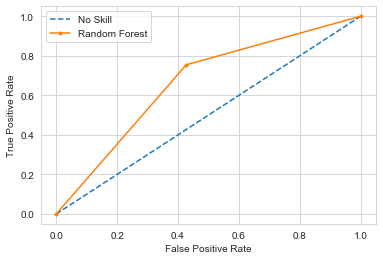

In [106]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Plotting Precision-Recall Curve

In [111]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

Random forest: f1=0.740 auc=0.810


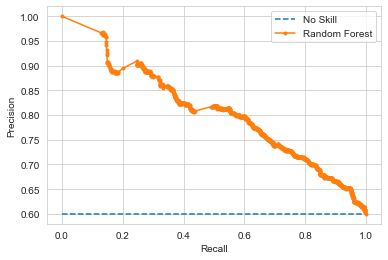

In [112]:
# predict probabilities
rf_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# predict class values
y_predict = model.predict(X_test)
rf_precision, rf_recall,_ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test, y_predict), auc(rf_recall, rf_precision)
# summarize scores
print('Random forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 1. Using Random Forest Classifier

### 1.1) Using GridSearchCV

### Import the necessary packages

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,f1_score,recall_score

### Using train-test split

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

### Define and train the Model

In [115]:
model=RandomForestClassifier(n_estimators=10,random_state=5)
parameters={'min_samples_split': [2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3],
              'n_estimators':[10,20],'random_state' : [5]}
grid=GridSearchCV(model,parameters,scoring='accuracy',cv=15)
grid.fit(X_train,y_train)

GridSearchCV(cv=15, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=5,
                                   

In [116]:
grid.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 20,
 'random_state': 5}

In [117]:
grid.best_score_

0.6932232496041848

### Predict the Model

In [118]:
y_train_predict=grid.predict(X_train)
y_predict=grid.predict(X_test)

### Generating the crosstab and confusion matrix

In [119]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[379 313]
 [234 906]]


col_0,0,1
Status,,
0,379,313
1,234,906


### Finding the accuracy, precision, recall and F1 score

In [120]:
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)

Accuracy of Training =  84.35225618631732
Accuracy of Testing =   70.14192139737992


In [121]:
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Precision score =  69.60305964549477
Recall score =  70.14192139737992
F1 score =  69.73812623563275


### Generate the classification report

In [122]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.62      0.55      0.58       692
           1       0.74      0.79      0.77      1140

    accuracy                           0.70      1832
   macro avg       0.68      0.67      0.67      1832
weighted avg       0.70      0.70      0.70      1832



### Plotting ROC curve

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.664


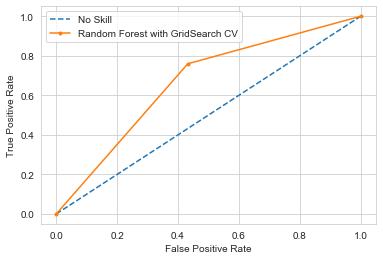

In [128]:
model.fit(X_train, y_train)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
rf_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, y_predict)
# Summarize the scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
#Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest with GridSearch CV')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Plotting Precision-Recall Curve

Random forest: f1=0.751 auc=0.813


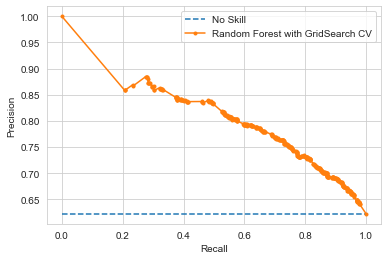

In [127]:
model.fit(X_train, y_train)
# predict probabilities
rf_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# predict class values
y_predict = model.predict(X_test)
rf_precision, rf_recall,_ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test, y_predict), auc(rf_recall, rf_precision)
# summarize scores
print('Random forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(rf_recall, rf_precision, marker='.', label='Random Forest with GridSearch CV')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

### 1.2) Using RandomizedSearchCV

### Define and train the Model

In [ ]:
model=RandomForestClassifier(n_estimators=10,random_state=5)
parameters={'min_samples_split': [2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3],
              'n_estimators':[10,20],'random_state' : [5]}
randomized=RandomizedSearchCV(model,parameters,scoring='accuracy',cv=15)
randomized.fit(X_train,y_train)

In [ ]:
randomized.best_params_

In [ ]:
randomized.best_score_

### Predict the Model

In [ ]:
y_train_predict=randomized.predict(X_train)
y_predict=randomized.predict(X_test)

### Generating confusion matrix and crosstab

In [ ]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

### Finding the accuracy, precision, recall and F1 score

In [ ]:
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

### Generate the classification report 

In [ ]:
print(classification_report(y_test,y_predict))

### Plotting ROC Curve

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.664


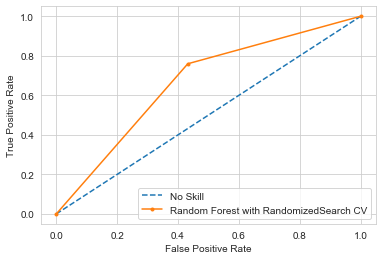

In [129]:
model.fit(X_train, y_train)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
rf_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, y_predict)
# Summarize the scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
#Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest with RandomizedSearch CV')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Plotting Precision-Recall Curve

Random forest: f1=0.751 auc=0.813


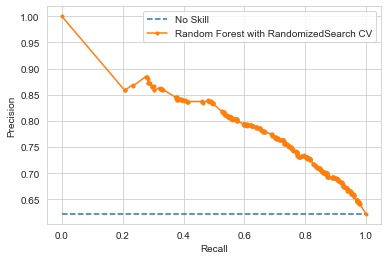

In [130]:
model.fit(X_train, y_train)
# predict probabilities
rf_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# predict class values
y_predict = model.predict(X_test)
rf_precision, rf_recall,_ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test, y_predict), auc(rf_recall, rf_precision)
# summarize scores
print('Random forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(rf_recall, rf_precision, marker='.', label='Random Forest with RandomizedSearch CV')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 1.3) Using Feature Engineering

In [131]:
data.corr()['Status'].sort_values()

Sales_Agent     -0.137074
Product_ID      -0.085415
Source           0.039717
Delivery_Mode    0.220445
Location         0.312023
Status           1.000000
Name: Status, dtype: float64

### Using train-test split

In [132]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

### Define and train the Model

In [133]:
model=RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=3,min_samples_split=2,
    min_samples_leaf=1,random_state=5)
model.fit(X_train,y_train)
pd.DataFrame(model.feature_importances_,index=X.columns).sort_values(0,ascending=False)

,0
2,0.463782
1,0.239023
3,0.167446
0,0.083303
4,0.046446


### Predict the Model

In [134]:
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

### Calculate confusion matrix and generate the crosstab

In [135]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[320 372]
 [158 982]]


col_0,0,1
Status,,
0,320,372
1,158,982


### Finding accuracy, precision, recall and F1 score 

In [136]:
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy of Training =  69.30494905385734
Accuracy of Testing =   71.06986899563319
Precision score =  70.41802842515348
Recall score =  71.06986899563319
F1 score =  69.66531043144609


### Generate the classification report

In [137]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.67      0.46      0.55       692
           1       0.73      0.86      0.79      1140

    accuracy                           0.71      1832
   macro avg       0.70      0.66      0.67      1832
weighted avg       0.70      0.71      0.70      1832



### Plotting ROC Curve

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.662


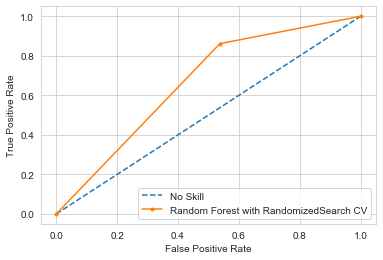

In [138]:
model.fit(X_train, y_train)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
rf_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, y_predict)
# Summarize the scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
#Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest with RandomizedSearch CV')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Plotting Precision-Recall Curve

Random forest: f1=0.787 auc=0.842


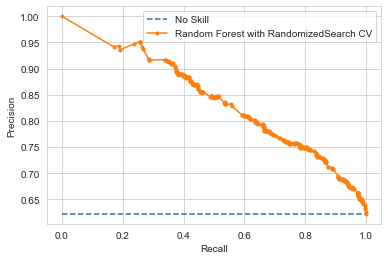

In [139]:
model.fit(X_train, y_train)
# predict probabilities
rf_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# predict class values
y_predict = model.predict(X_test)
rf_precision, rf_recall,_ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test, y_predict), auc(rf_recall, rf_precision)
# summarize scores
print('Random forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(rf_recall, rf_precision, marker='.', label='Random Forest with RandomizedSearch CV')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 2. Using XGBoost Classifier Algorithm

In [140]:
from xgboost import XGBClassifier

### Using train-test split

In [141]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

### Define and Train the Model

In [142]:
model=XGBClassifier(max_depth=3,learning_rate=0.01,test_size=0.25,n_estimators=500,n_jobs=1,random_state=5,gamma=5)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=5, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, test_size=0.25,
              tree_method=None, validate_parameters=False, verbosity=None)

### Predict the Model

In [143]:
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

### Calculating confusion matrix and generating crosstab

In [144]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[372 320]
 [197 943]]


col_0,0,1
Status,,
0,372,320
1,197,943


### Finding accuracy, precision, recall and F1 score 

In [145]:
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy score of Training =  72.48908296943232
Accuracy score of Testing =  71.77947598253274
Precision score =  71.15604029632028
Recall score =  71.77947598253274
F1 score =  71.12538609313704


### Generate the classification report 

In [146]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.65      0.54      0.59       692
           1       0.75      0.83      0.78      1140

    accuracy                           0.72      1832
   macro avg       0.70      0.68      0.69      1832
weighted avg       0.71      0.72      0.71      1832



### Plotting ROC Curve

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.682


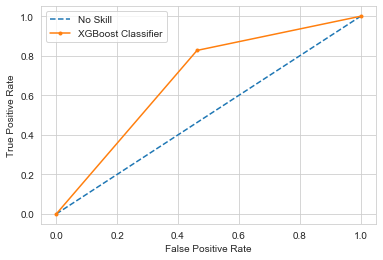

In [148]:
model.fit(X_train, y_train)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
xgb_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
xgb_auc = roc_auc_score(y_test, y_predict)
# Summarize the scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
#Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost Classifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Plotting Precision-Recall Curve

XGBoost : f1=0.785 auc=0.863


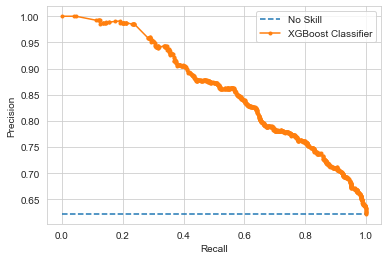

In [149]:
model.fit(X_train, y_train)
# predict probabilities
xgb_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]
# predict class values
y_predict = model.predict(X_test)
xgb_precision, xgb_recall,_ = precision_recall_curve(y_test, xgb_probs)
xgb_f1, xgb_auc = f1_score(y_test, y_predict), auc(xgb_recall, xgb_precision)
# summarize scores
print('XGBoost : f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(xgb_recall, xgb_precision, marker='.', label='XGBoost Classifier')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 3. Gradient Boosting Classifier

In [150]:
from sklearn.ensemble import GradientBoostingClassifier

### Using train-test split

In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

### Define and train the Model

In [152]:
model=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,subsample=1.0,max_depth=3,random_state=5)
model.fit(X_train,y_train)
print(" Model Feature Importances = " ,model.feature_importances_)

 Model Feature Importances =  [0.1223136  0.27825354 0.39356742 0.15759282 0.04827261]


### Predict the Model

In [153]:
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

### Calculating confusion matrix and generating crosstab

In [154]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[375 317]
 [194 946]]


col_0,0,1
Status,,
0,375,317
1,194,946


### Finding accuracy, precision, recall and F1 score 

In [155]:
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)

Accuracy of Training =  74.59970887918487
Accuracy of Testing =   72.10698689956332


In [156]:
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Precision score =  71.50300233949454
Recall score =  72.10698689956332
F1 score =  71.46048799534435


### Generate the classification report

In [157]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.66      0.54      0.59       692
           1       0.75      0.83      0.79      1140

    accuracy                           0.72      1832
   macro avg       0.70      0.69      0.69      1832
weighted avg       0.72      0.72      0.71      1832



### Plottting ROC Curve

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.686


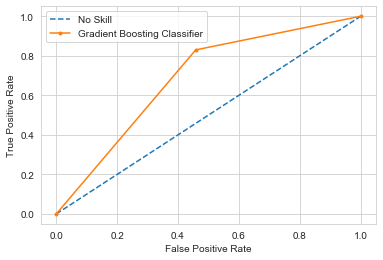

In [158]:
model.fit(X_train, y_train)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
gb_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
gb_probs = gb_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
gb_auc = roc_auc_score(y_test, y_predict)
# Summarize the scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (gb_auc))
#Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting Classifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Plotting Precision-Recall Curve

Gradient Boosting : f1=0.787 auc=0.867


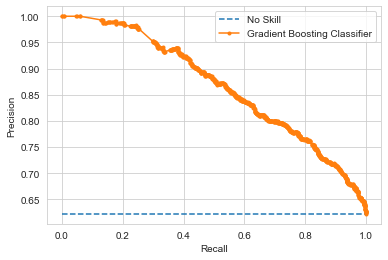

In [159]:
model.fit(X_train, y_train)
# predict probabilities
gb_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
gb_probs = gb_probs[:, 1]
# predict class values
y_predict = model.predict(X_test)
gb_precision, gb_recall,_ = precision_recall_curve(y_test, gb_probs)
gb_f1, gb_auc = f1_score(y_test, y_predict), auc(gb_recall, gb_precision)
# summarize scores
print('Gradient Boosting : f1=%.3f auc=%.3f' % (gb_f1, gb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(gb_recall, gb_precision, marker='.', label='Gradient Boosting Classifier')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 4. Support Vector Machine (SVM)

### Import the necessary package

In [262]:
from sklearn.svm import SVC

### Using train-test split

In [263]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

### Define and train the Model

In [264]:
model=SVC(C=130,kernel = 'rbf',degree=4,gamma='scale',random_state=5,probability=True)
model.fit(X_train,y_train)

SVC(C=130, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=5, shrinking=True, tol=0.001,
    verbose=False)

### Predict the Model

In [265]:
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

### Calculating confusion matrix and generating crosstab

In [266]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[342 350]
 [214 926]]


col_0,0,1
Status,,
0,342,350
1,214,926


### Finding accuracy, precision, recall and F1 score 

In [267]:
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy score of Training =  72.45269286754002
Accuracy score of Testing =  69.21397379912663
Precision score =  68.39294495055145
Recall score =  69.21397379912663
F1 score =  68.40302417874788


### Generate the classification report

In [268]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.62      0.49      0.55       692
           1       0.73      0.81      0.77      1140

    accuracy                           0.69      1832
   macro avg       0.67      0.65      0.66      1832
weighted avg       0.68      0.69      0.68      1832



### Plotting ROC Curve

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.653


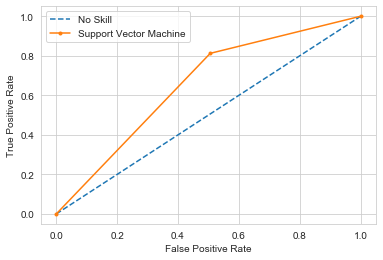

In [269]:
model.fit(X_train, y_train)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
svm_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
svm_auc = roc_auc_score(y_test, y_predict)
# Summarize the scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
#Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='Support Vector Machine')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Plotting Precision-Recall Curve

SVM : f1=0.767 auc=0.767


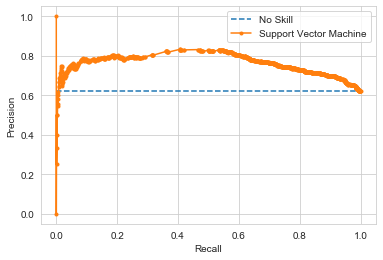

In [270]:
model.fit(X_train, y_train)
# predict probabilities
svm_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]
# predict class values
y_predict = model.predict(X_test)
svm_precision, svm_recall,_ = precision_recall_curve(y_test, svm_probs)
svm_f1, svm_auc = f1_score(y_test, y_predict), auc(svm_recall, svm_precision)
# summarize scores
print('SVM : f1=%.3f auc=%.3f' % (svm_f1, svm_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(svm_recall, svm_precision, marker='.', label='Support Vector Machine')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 5. Artificial Neural Networks (ANN)

### Import the necessary package

In [189]:
from sklearn.neural_network import MLPClassifier

### Using train-test split

In [190]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

### Define and train the Model

In [191]:
model=MLPClassifier(hidden_layer_sizes=10,activation='relu', alpha=0.001,batch_size=10,learning_rate_init=0.01,random_state=5)
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size=10, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=5, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### Predict the Model

In [192]:
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

### Calculating the confusion matrix and generating the crosstab

In [193]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[360 332]
 [241 899]]


col_0,0,1
Status,,
0,360,332
1,241,899


### Finding accuracy, precision, recall and F1 score

In [194]:
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy score of Training =  68.10407569141194
Accuracy score of Testing =  68.72270742358079
Precision score =  68.0705130823014
Recall score =  68.72270742358079
F1 score =  68.22229367718045


### Generating the classification report

In [195]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.60      0.52      0.56       692
           1       0.73      0.79      0.76      1140

    accuracy                           0.69      1832
   macro avg       0.66      0.65      0.66      1832
weighted avg       0.68      0.69      0.68      1832



### Plotting ROC Curve

No Skill: ROC AUC=0.500
ANN: ROC AUC=0.654


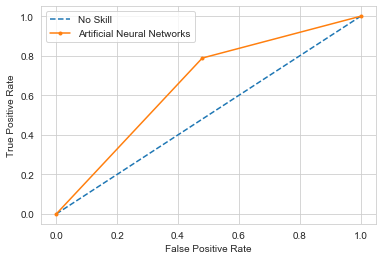

In [196]:
model.fit(X_train, y_train)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
ann_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ann_probs = ann_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
ann_auc = roc_auc_score(y_test, y_predict)
# Summarize the scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('ANN: ROC AUC=%.3f' % (ann_auc))
#Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
ann_fpr, ann_tpr, _ = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(ann_fpr, ann_tpr, marker='.', label='Artificial Neural Networks')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Plotting Precision-Recall Curve

ANN : f1=0.758 auc=0.801


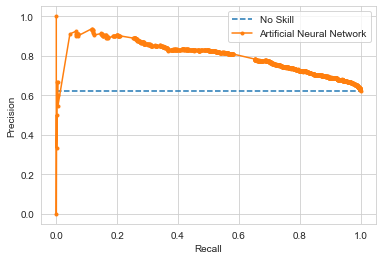

In [198]:
model.fit(X_train, y_train)
# predict probabilities
ann_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ann_probs = ann_probs[:, 1]
# predict class values
y_predict = model.predict(X_test)
ann_precision, ann_recall,_ = precision_recall_curve(y_test, ann_probs)
ann_f1, ann_auc = f1_score(y_test, y_predict), auc(ann_recall, ann_precision)
# summarize scores
print('ANN : f1=%.3f auc=%.3f' % (ann_f1, ann_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(ann_recall, ann_precision, marker='.', label='Artificial Neural Network')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 6. Decision Tree classifier

### Import the necessary package 

In [200]:
from sklearn.tree import DecisionTreeClassifier

### Using train-test split

In [201]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

### Define and train the Model

In [202]:
model=DecisionTreeClassifier(splitter='best',random_state=5, min_samples_split=3,max_depth=4,
    min_samples_leaf=3,criterion='gini')
model.fit(X_train,y_train)
print("Model Feature Importances = " ,model.feature_importances_)

Model Feature Importances =  [0.09102629 0.26533006 0.51540175 0.11586742 0.01237448]


### Predict the Model

In [203]:
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

### Calculating confusion matrix and generating crosstab

In [204]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[275 417]
 [145 995]]


col_0,0,1
Status,,
0,275,417
1,145,995


### Finding accuracy, precision, recall and F1 score

In [205]:
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy score of Training =  68.79548762736536
Accuracy score of Testing =  69.32314410480349
Precision score =  68.58208788172789
Recall score =  69.32314410480349
F1 score =  67.2061151916238


### Generating the classification report 

In [206]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.65      0.40      0.49       692
           1       0.70      0.87      0.78      1140

    accuracy                           0.69      1832
   macro avg       0.68      0.64      0.64      1832
weighted avg       0.69      0.69      0.67      1832



### Plotting ROC Curve

No Skill: ROC AUC=0.500
Decision Tree Classifier: ROC AUC=0.635


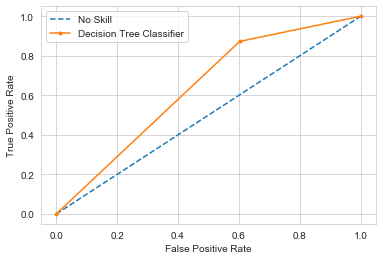

In [207]:
model.fit(X_train, y_train)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
dt_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, y_predict)
# Summarize the scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree Classifier: ROC AUC=%.3f' % (dt_auc))
#Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(dt_fpr,dt_tpr, marker='.', label='Decision Tree Classifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Plotting Precision-Recall Curve

Decision Tree Classifier  : f1=0.780 auc=0.699


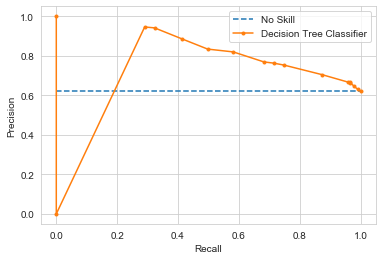

In [208]:
model.fit(X_train, y_train)
# predict probabilities
dt_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]
# predict class values
y_predict = model.predict(X_test)
dt_precision, dt_recall,_ = precision_recall_curve(y_test, dt_probs)
dt_f1, dt_auc = f1_score(y_test, y_predict), auc(dt_recall, dt_precision)
# summarize scores
print('Decision Tree Classifier  : f1=%.3f auc=%.3f' % (dt_f1, dt_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(dt_recall, dt_precision, marker='.', label='Decision Tree Classifier')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 7. Logistic Regression 

### Import the necessary package

In [209]:
from sklearn.linear_model import LogisticRegression

### Using train-test split

In [210]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

### Define and train the Model

In [211]:
model=LogisticRegression(random_state=5,C=2.0,multi_class='ovr')
model.fit(X_train,y_train)

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=5,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

### Predict the Model

In [212]:
y_train_predict=model.predict(X_train)
y_predict= model.predict(X_test)

### Generating the confusion matrix and crosstab

In [213]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[355 337]
 [225 915]]


col_0,0,1
Status,,
0,355,337
1,225,915


### Finding the accuracy, precision, recall and F1 score

In [214]:
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='micro')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='micro')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='micro')*100))

Accuracy score of Training =  66.64847161572052
Accuracy score of Testing =  69.32314410480349
Precision score =  69.32314410480349
Recall score =  69.32314410480349
F1 score =  69.32314410480349


### Generating the classification report

In [215]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.61      0.51      0.56       692
           1       0.73      0.80      0.77      1140

    accuracy                           0.69      1832
   macro avg       0.67      0.66      0.66      1832
weighted avg       0.69      0.69      0.69      1832



### Plotting ROC Curve

No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.658


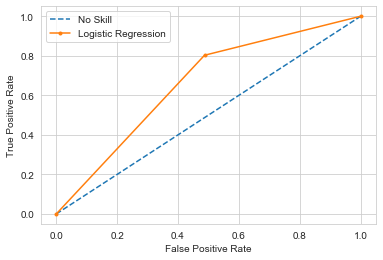

In [216]:
model.fit(X_train, y_train)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_predict)
# Summarize the scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
#Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr,lr_tpr, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Plotting Precision-Recall Curve

Logistic Regression  : f1=0.765 auc=0.754


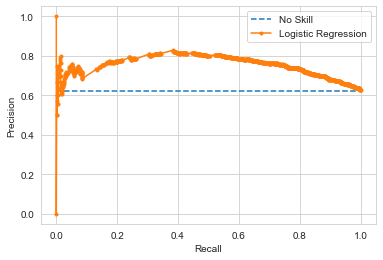

In [217]:
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
y_predict = model.predict(X_test)
lr_precision, lr_recall,_ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_predict), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic Regression  : f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 8. K-Nearest Neighbors

### Import the necessary package

In [218]:
from sklearn.neighbors import KNeighborsClassifier

### Using train-test split 

In [219]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

### Define and Train the Model

In [220]:
model= KNeighborsClassifier(n_neighbors=100, metric='minkowski')
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

### Predict the Model

In [221]:
y_train_predict=model.predict(X_train)
y_predict = model.predict(X_test)

### Generating the confusion matrix and crosstab

In [222]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[356 336]
 [224 916]]


col_0,0,1
Status,,
0,356,336
1,224,916


### Finding the accuracy, precision, recall and F1 score

In [223]:
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy score of Training =  69.28675400291121
Accuracy score of Testing =  69.43231441048034
Precision score =  68.7119178806456
Recall score =  69.43231441048034
F1 score =  68.80219868136803


### Generating the classification report

In [224]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.61      0.51      0.56       692
           1       0.73      0.80      0.77      1140

    accuracy                           0.69      1832
   macro avg       0.67      0.66      0.66      1832
weighted avg       0.69      0.69      0.69      1832



### Plotting ROC Curve

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.659


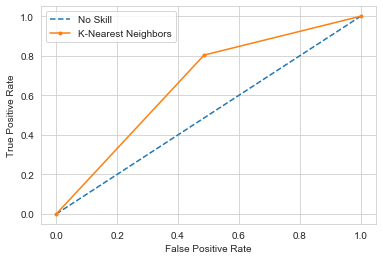

In [225]:
model.fit(X_train, y_train)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
knn_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
knn_auc = roc_auc_score(y_test, y_predict)
# Summarize the scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
#Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(knn_fpr,knn_tpr, marker='.', label='K-Nearest Neighbors')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Plotting Precision-Recall Curve

K-Nearest Neighbors  : f1=0.766 auc=0.851


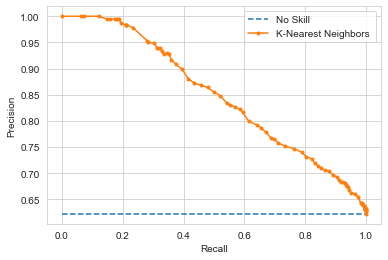

In [226]:
model.fit(X_train, y_train)
# predict probabilities
knn_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
# predict class values
y_predict = model.predict(X_test)
knn_precision, knn_recall,_ = precision_recall_curve(y_test, knn_probs)
knn_f1, knn_auc = f1_score(y_test, y_predict), auc(knn_recall, knn_precision)
# summarize scores
print('K-Nearest Neighbors  : f1=%.3f auc=%.3f' % (knn_f1, knn_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(knn_recall, knn_precision, marker='.', label='K-Nearest Neighbors ')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# 9. Naive Bayes

### Import the necessary packages

In [227]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB

### Using train-test split

In [228]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

### Define and Train the Model for Bernoulli Naive Bayes

In [229]:
model_bernoulli = BernoulliNB(alpha=2.0)
model_bernoulli.fit(X_train,y_train)

BernoulliNB(alpha=2.0, binarize=0.0, class_prior=None, fit_prior=True)

### Predict the Model

In [230]:
y_predict_bernoulli = model_bernoulli.predict(X_test)

In [231]:
print(confusion_matrix(y_test,y_predict_bernoulli))
pd.crosstab(y_test,y_predict_bernoulli)

[[387 305]
 [276 864]]


col_0,0,1
Status,,
0,387,305
1,276,864


In [232]:
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict_bernoulli)*100)
print("Precision score = ",(precision_score(y_test,y_predict_bernoulli,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict_bernoulli,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict_bernoulli,average='weighted')*100))

Accuracy score of Testing =  68.28602620087337
Precision score =  68.04005992300351
Recall score =  68.28602620087337
F1 score =  68.14580818679296


In [233]:
print(classification_report(y_test,y_predict_bernoulli))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57       692
           1       0.74      0.76      0.75      1140

    accuracy                           0.68      1832
   macro avg       0.66      0.66      0.66      1832
weighted avg       0.68      0.68      0.68      1832



### Plotting ROC Curve

No Skill: ROC AUC=0.500
Bernoulli NB: ROC AUC=0.659


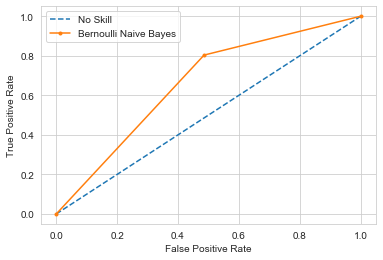

In [234]:
model.fit(X_train, y_train)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
bernoulli_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
bernoulli_probs = bernoulli_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
bernoulli_auc = roc_auc_score(y_test, y_predict)
# Summarize the scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Bernoulli NB: ROC AUC=%.3f' % (bernoulli_auc))
#Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
bernoulli_fpr, bernoulli_tpr, _ = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(bernoulli_fpr,bernoulli_tpr, marker='.', label='Bernoulli Naive Bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Plotting Precision-Recall Curve

Bernoulli Naive Bayes  : f1=0.766 auc=0.851


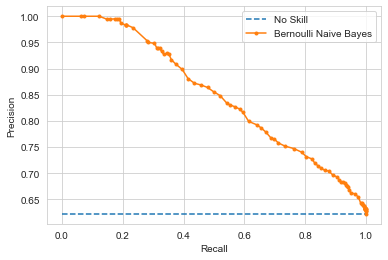

In [235]:
model.fit(X_train, y_train)
# predict probabilities
bernoulli_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
bernoulli_probs = bernoulli_probs[:, 1]
# predict class values
y_predict = model.predict(X_test)
bernoulli_precision, bernoulli_recall,_ = precision_recall_curve(y_test, bernoulli_probs)
bernoulli_f1, bernoulli_auc = f1_score(y_test, y_predict), auc(bernoulli_recall, bernoulli_precision)
# summarize scores
print('Bernoulli Naive Bayes  : f1=%.3f auc=%.3f' % (bernoulli_f1, bernoulli_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(bernoulli_recall, bernoulli_precision, marker='.', label='Bernoulli Naive Bayes')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Define and Train the Model for Gaussian Naive Bayes

In [236]:
model_gaussian = GaussianNB()
model_gaussian.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Predict the Model

In [237]:
y_predict_gaussian = model_gaussian.predict(X_test)

### Calculating confusion matrix and generating the crosstab 

In [238]:
print(confusion_matrix(y_test,y_predict_gaussian))
pd.crosstab(y_test,y_predict_gaussian)

[[361 331]
 [241 899]]


col_0,0,1
Status,,
0,361,331
1,241,899


### Calculating the Accuracy, precision, recall and F1 score

In [239]:
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict_gaussian)*100)
print("Precision score = ",(precision_score(y_test,y_predict_gaussian,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict_gaussian,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict_gaussian,average='weighted')*100))

Accuracy score of Testing =  68.77729257641921
Precision score =  68.13262073487424
Recall score =  68.77729257641921
F1 score =  68.28433139451188


### Generating the classification report

In [240]:
print(classification_report(y_test,y_predict_gaussian))

              precision    recall  f1-score   support

           0       0.60      0.52      0.56       692
           1       0.73      0.79      0.76      1140

    accuracy                           0.69      1832
   macro avg       0.67      0.66      0.66      1832
weighted avg       0.68      0.69      0.68      1832



### Plotting ROC Curve

No Skill: ROC AUC=0.500
Gaussian NB: ROC AUC=0.659


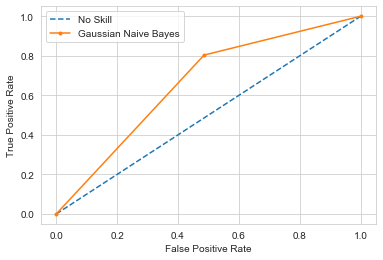

In [241]:
model.fit(X_train, y_train)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
gaussian_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
gaussian_probs = gaussian_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
gaussian_auc = roc_auc_score(y_test, y_predict)
# Summarize the scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gaussian NB: ROC AUC=%.3f' % (gaussian_auc))
#Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
gaussian_fpr,gaussian_tpr, _ = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(gaussian_fpr,gaussian_tpr, marker='.', label='Gaussian Naive Bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Plotting Precision-Recall Curve

Gaussian Naive Bayes  : f1=0.766 auc=0.851


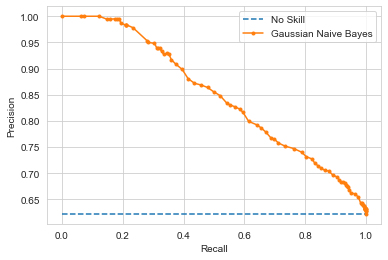

In [242]:
model.fit(X_train, y_train)
# predict probabilities
gaussian_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
gaussian_probs = gaussian_probs[:, 1]
# predict class values
y_predict = model.predict(X_test)
gaussian_precision, gaussian_recall,_ = precision_recall_curve(y_test, gaussian_probs)
gaussian_f1, gaussian_auc = f1_score(y_test, y_predict), auc(gaussian_recall, gaussian_precision)
# summarize scores
print('Gaussian Naive Bayes  : f1=%.3f auc=%.3f' % (gaussian_f1, gaussian_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(gaussian_recall, gaussian_precision, marker='.', label='Gaussian Naive Bayes')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 10. ExtraTreesClassifier

### Import the necessary package

In [243]:
from sklearn.ensemble import ExtraTreesClassifier 

### Using train-test split

In [244]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

### Define and Train the Model

In [245]:
model=ExtraTreesClassifier(n_estimators=100,criterion='gini',random_state=5,max_depth=3,bootstrap=True)
model.fit(X_train,y_train)
print(" Model Feature Importances = " ,model.feature_importances_)

 Model Feature Importances =  [0.0954283  0.20431814 0.4436149  0.1456605  0.11097816]


### Predict the Model

In [246]:
y_train_predict=model.predict(X_train)
y_predict= model.predict(X_test)

### Generating the confusion matrix and crosstab

In [247]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[ 148  544]
 [  44 1096]]


col_0,0,1
Status,,
0,148,544
1,44,1096


### Finding accuracy, precision, recall and F1 score

In [248]:
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy score of Training =  66.41193595342067
Accuracy score of Testing =  67.90393013100436
Precision score =  70.70252866829978
Recall score =  67.90393013100436
F1 score =  61.713324513184794


### Generating the classification report

In [249]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.21      0.33       692
           1       0.67      0.96      0.79      1140

    accuracy                           0.68      1832
   macro avg       0.72      0.59      0.56      1832
weighted avg       0.71      0.68      0.62      1832



### Plotting ROC Curve

No Skill: ROC AUC=0.500
Extra Trees Classifier: ROC AUC=0.588


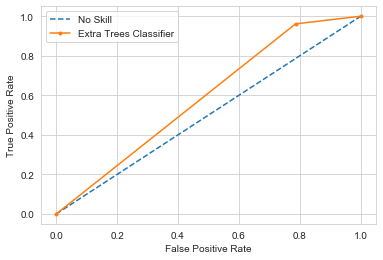

In [250]:
model.fit(X_train, y_train)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
et_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
et_probs = et_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
et_auc = roc_auc_score(y_test, y_predict)
# Summarize the scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Extra Trees Classifier: ROC AUC=%.3f' % (et_auc))
#Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
et_fpr,et_tpr, _ = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(et_fpr,et_tpr, marker='.', label='Extra Trees Classifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Plotting Precision-Recall Curve

Extra Trees Classifier : f1=0.788 auc=0.842


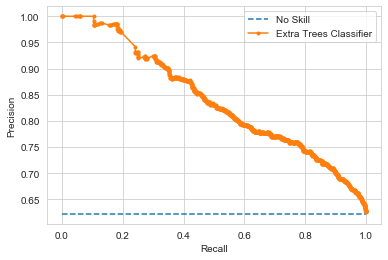

In [251]:
model.fit(X_train, y_train)
# predict probabilities
et_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
et_probs = et_probs[:, 1]
# predict class values
y_predict = model.predict(X_test)
et_precision, et_recall,_ = precision_recall_curve(y_test, et_probs)
et_f1, et_auc = f1_score(y_test, y_predict), auc(et_recall, et_precision)
# summarize scores
print('Extra Trees Classifier : f1=%.3f auc=%.3f' % (et_f1, et_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(et_recall, et_precision, marker='.', label='Extra Trees Classifier')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()